## Load Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam, Adamax

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
base_dir = "data"
folders = os.listdir(base_dir)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


## Preprocessing

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,                               
    horizontal_flip=True,
    validation_split=0.3)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(256 , 256),
    batch_size= 4,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(256, 256),
    batch_size= 4,
    class_mode='categorical',
    subset='validation')

Found 789 images belonging to 4 classes.
Found 336 images belonging to 4 classes.


In [18]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k, v in labels.items())
print(labels)

{0: 'Cloudy', 1: 'Rain', 2: 'Shine', 3: 'Sunrise'}


In [19]:
base_model = tf.keras.applications.xception.Xception(include_top=False, weights="imagenet",input_shape=(256,256,3), pooling='max')

model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(4, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 batch_normalization_9 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 21,395,244
Trainable params: 21,336,620
Non-trainable params: 58,624
_____________________________________

In [87]:
hist = model.fit(train_generator ,
          validation_data = validation_generator ,
          epochs = 30)

Epoch 1/30
198/198 [==============================] - 28s 138ms/step - loss: 0.7920 - accuracy: 0.9392 - val_loss: 0.7563 - val_accuracy: 0.9048
Epoch 2/30
198/198 [==============================] - 28s 140ms/step - loss: 0.6352 - accuracy: 0.9544 - val_loss: 0.6210 - val_accuracy: 0.9375
Epoch 3/30
198/198 [==============================] - 28s 142ms/step - loss: 0.5506 - accuracy: 0.9468 - val_loss: 0.5273 - val_accuracy: 0.9583
Epoch 4/30
198/198 [==============================] - 28s 140ms/step - loss: 0.4982 - accuracy: 0.9544 - val_loss: 0.4494 - val_accuracy: 0.9732
Epoch 5/30
198/198 [==============================] - 27s 137ms/step - loss: 0.4378 - accuracy: 0.9632 - val_loss: 0.5311 - val_accuracy: 0.9226
Epoch 6/30
198/198 [==============================] - 28s 140ms/step - loss: 0.4318 - accuracy: 0.9556 - val_loss: 0.3827 - val_accuracy: 0.9702
Epoch 7/30
198/198 [==============================] - 28s 141ms/step - loss: 0.3882 - accuracy: 0.9696 - val_loss: 0.3604 - val_ac

<function matplotlib.pyplot.show(close=None, block=None)>

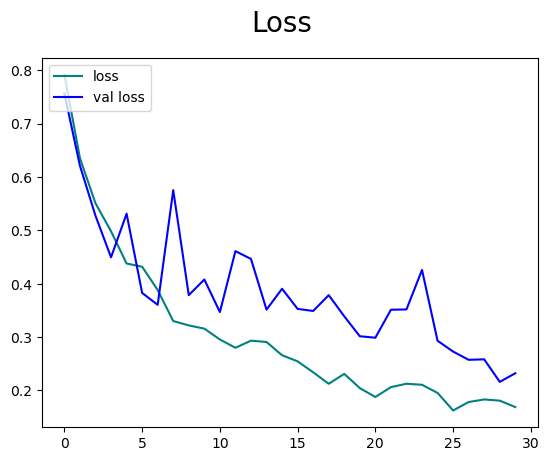

In [88]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='blue', label='val loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show

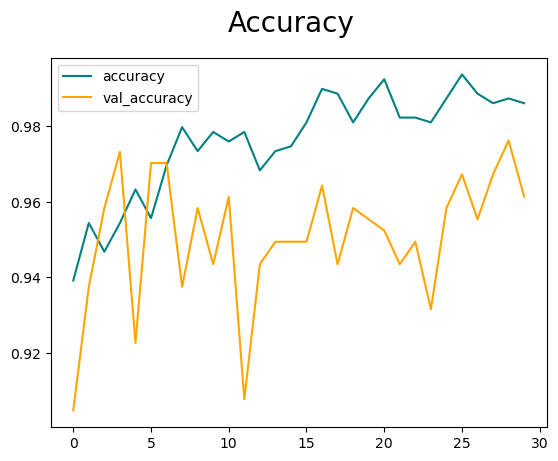

In [89]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [94]:
import cv2

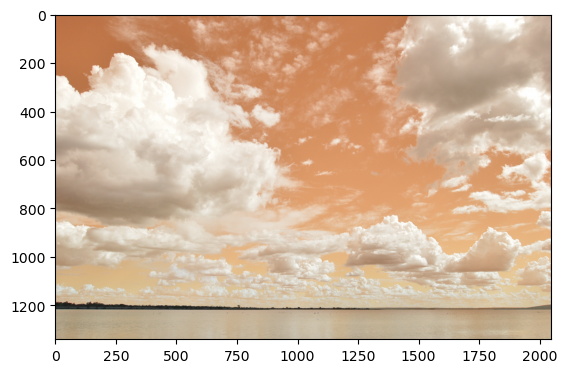

In [126]:
img = cv2.imread("C:/Users/parag/OneDrive/Desktop/c.jpg")
plt.imshow(img)
plt.show()

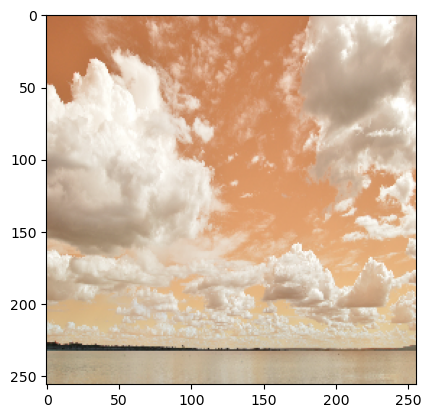

In [127]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [128]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 47ms/step


In [129]:
yhat

array([[0.7704958 , 0.02592502, 0.04531075, 0.15826844]], dtype=float32)

In [130]:
dic = {yhat[0][0]:'Cloudy', yhat[0][1]:'Rainy', yhat[0][2]:'Shine', yhat[0][3]:'Sunrise'}


In [131]:
print(dic[max(yhat[0])])

Cloudy


In [132]:
model.save('Weather-Model.h5')